In [134]:
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter

with MPRester("rtIvjK8boEIrBtPMF") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1011695")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1011695")

# Bande interdite

On observe un gap indirect (l'énergie maximale de la bande de valence ne possède pas le même vecteur d'onde que l'énergie minimale de la première bande de conduction) de 1.7952eV. 

{'direct': False, 'energy': 1.7952000000000001, 'transition': 'X-\\Gamma'}


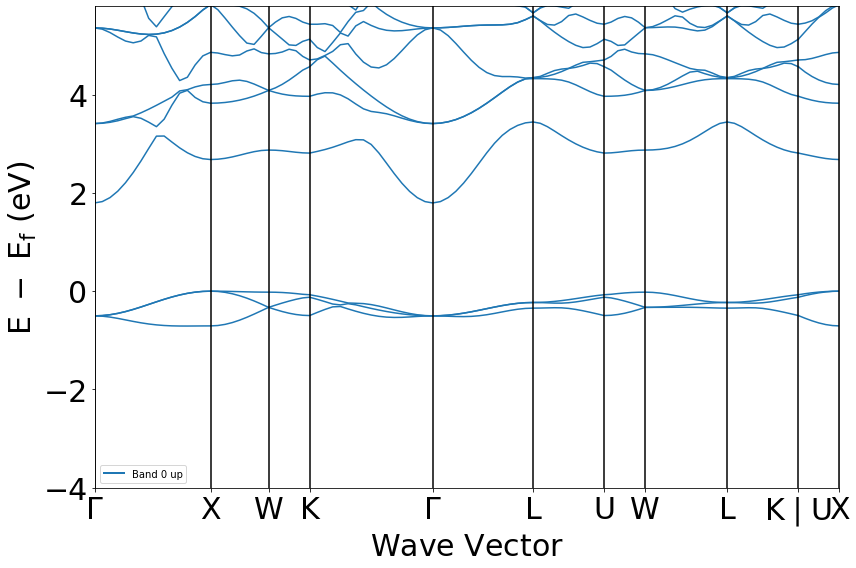

In [135]:
bandgap = bandstructure.get_band_gap()
print(bandgap)
plotter = BSPlotter(bandstructure)
plot = plotter.get_plot()

# Dispersion des bandes de valence et conduction

Comme observé sur le graphe suivant, on observe au sein de la dernière bande de valence un minimum de dispersion selon la direction X-W, et un maximum de dispersion selon la direction Γ-X.

Concernant la première bande de conduction, on observe un minimum de dispersion selon la direction U-W et un maximum de dispersion selon la direction Γ-L.

Sur le schéma, les directions présentant la dispersion la plus faible sont représentés par des flèches rouges, contre des flèches bleues pour les directions présentant la dispersion la plus élevé.

defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]}) 
La bandes d'indice 11 est la dernière bande de valence.

defaultdict(<class 'list'>, {<Spin.up: 1>: [12]}) 
La bande d'indice 12 est la première bande de conduction.

L'indice représentant la direction présentant le moins de dispersion dans la dernière bande de valence est 1 .
Cela correspond à la direction X-W.

L'indice représentant la direction présentant le plus de dispersion dans la dernière bande de valence est 0 .
Cela correspond à la direction Γ-X.

L'indice représentant la direction présentant le moins de dispersion dans la première bande de conduction est 6 .
Cela correspond à la direction U-W.

L'indice représentant la direction présentant le moins de dispersion dans la première bande de conduction est 4 .
Cela correspond à la direction Γ-L.



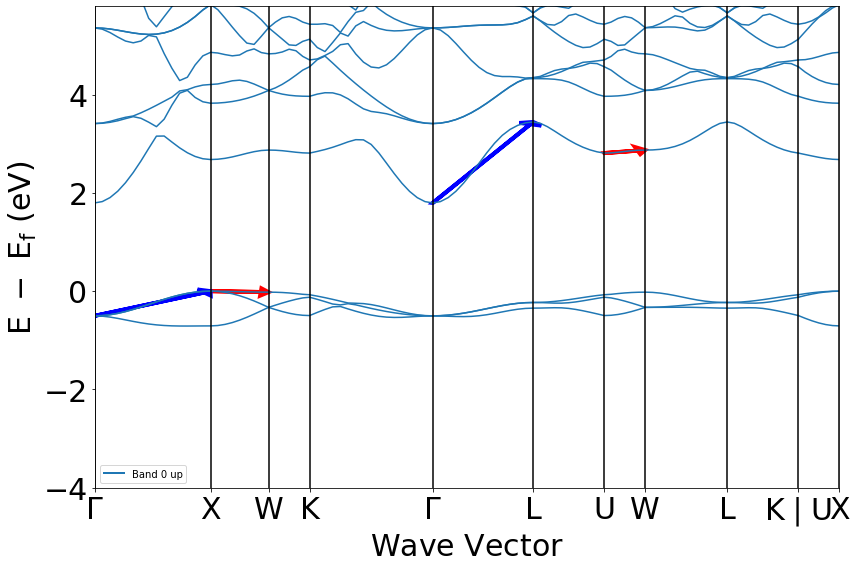

In [136]:
plotter = BSPlotter(bandstructure)
plot = plotter.get_plot()

# ax = plt.gca()
# ax.set_title("Cs2Se Band Structure", fontsize=30)

data = plotter.bs_plot_data()
energies = data.get('energy').get('1')
valence = bandstructure.get_vbm()
conduction = bandstructure.get_cbm()

valence_index = valence['band_index']
conduction_index = conduction['band_index']

print(valence_index, "\nLa bandes d'indice 11 est la dernière bande de valence.\n")
print(conduction_index, "\nLa bande d'indice 12 est la première bande de conduction.\n")

absc_dupl = data.get('ticks').get('distance')
absc = [] # On retire les doublons des abscisses considérées.
for i in range(len(absc_dupl)):
    if absc_dupl[i] not in absc:
        absc.append(absc_dupl[i])
absc = np.array(absc)


deltaX = absc[1:] - absc[0:-1]

# Calcul des pentes pour la bande de valence et de conduction
slopeVal = np.zeros_like(deltaX)
slopeCond = np.zeros_like(deltaX)

for i in range(len(deltaX)):
    slopeVal[i] = (energies[i][11][-1] - energies[i][11][0])/deltaX[i]
    slopeCond[i] = (energies[i][12][-1] - energies[i][12][0])/deltaX[i]
        
minVal = min(abs(slopeVal))
maxVal = max(abs(slopeVal))
minCond = min(abs(slopeCond))
maxCond = max(abs(slopeCond))

minIndexVal, maxIndexVal, minIndexCond, maxIndexCond = 0, 0, 0, 0

# Calcul de l'index selon lequel la dispersion est minimale ou maximale. 
for i in range(len(deltaX)):
    if abs(slopeVal[i]) == minVal:
        minIndexVal = i
    if abs(slopeVal[i]) == maxVal:
        maxIndexVal = i
    if abs(slopeCond[i]) == minCond:
        minIndexCond = i
    if abs(slopeCond[i]) == maxCond:
        maxIndexCond = i
        
        

print("L'indice représentant la direction présentant le moins de dispersion dans la dernière bande de valence est"
      , minIndexVal, ".\nCela correspond à la direction X-W.\n")
print("L'indice représentant la direction présentant le plus de dispersion dans la dernière bande de valence est"
      , maxIndexVal, ".\nCela correspond à la direction Γ-X.\n")
print("L'indice représentant la direction présentant le moins de dispersion dans la première bande de conduction est"
      , minIndexCond, ".\nCela correspond à la direction U-W.\n")
print("L'indice représentant la direction présentant le moins de dispersion dans la première bande de conduction est"
      , maxIndexCond, ".\nCela correspond à la direction Γ-L.\n")

# Plus petite dispersion, bande de valence
plt.arrow(absc[1], energies[1][11][0], absc[2]-absc[1], energies[1][11][-1]-energies[1][11][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)

# Plus grande dispersion, bande de valence
plt.arrow(absc[0], energies[0][11][0], absc[1]-absc[0], energies[0][11][-1]-energies[0][11][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)

# Plus petite dispersion, bande de conduction
plt.arrow(absc[6], energies[6][12][0], absc[7]-absc[6], energies[6][12][-1]-energies[6][12][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)

# Plus grande dispersion, bande de conduction
plt.arrow(absc[4], energies[4][12][0], absc[5]-absc[4], energies[4][12][-1]-energies[4][12][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)



plt.show()

# Masse effective

La masse effective est donnée par la relation suivante (en unités atomiques) : 
$$m^{\ast} = \left(\frac{\partial^2E}{\partial k^2} \right)^{-1}$$

Les unités atomiques n'étant pas utilisées ici, il convient d'ajouter la constante de Planck réduite, en tenant compte du fait que l'on travaille en eV : 
$$m^{\ast} = \hbar^2\left(\frac{\partial^2E}{\partial k^2} \right)^{-1}$$

Pour calculer la masse effective, on fera l'hypothèse d'une dispersion parabolique. Il est alors possible de retrouver cette relation à partir du point considéré (le minimum de la bande de conduction ou le maximum de la bande de valence), ainsi qu'un autre point sur la même bande d'énergie. En effet, le premier point étant le sommet de la parabole, un seul autre point suffit par symétrie. Etant donné qu'on cherche à calculer la dérivée local en l'extremum, il est judicieux de prendre un point assez proche de ce dernier pour avoir une interpolation précise autour de l'extremum (on n'est pas intéressé par les points loin de l'extremum).

On observe en mauve les deux paraboles interpolées. L'approximation est très correcte pour la bande de conduction, mais peu précise pour la bande de valence, car celle-ci est très non-symétrique de part et autre du maximum.

### Calcul de la masse effective
Dans la bande de valence, la parabole prend la forme suivante ($x_{max}$ étant le sommet de la bande, $x_2$ l'autre point de l'interpolation et $\epsilon_2$ l'énergie associée à $x_2$) : 
$$ E(x) = \alpha (x-x_{max})^2$$
avec $\alpha = \frac{\epsilon_2}{(x_2-x_{max})^2}$. On trouve alors directement : 
$$m^{\ast} = \hbar^2\frac{1}{2\alpha} $$
On obtient alors une masse effective valant -1.0566397639958359e-29kg.

Dans la bande de conduction, le calcul est très similaire ($x_{min}$ étant le minimum de la parabole, $\epsilon_{min}$ l'énergie associée à $x_{min}$, $x_2$ l'autre point de l'interpolation et $\epsilon_2$ l'énergie associée à $x_2$) : 
$$ E(x) = \alpha (x-x_{min})^2 + \epsilon{min}$$
avec  $\alpha = \frac{\epsilon_2-\epsilon_{min}}{(x_2-x_{min})^2}$. On trouve alors directement : 
$$m^{\ast} = \hbar^2\frac{1}{2\alpha} $$
On obtient alors une masse effective valant 3.1977971672148667e-31kg. 

Masse effective au sommet de la bande de valence : -1.0566397639958359e-29 kg.

Masse effective au minimum de la bande de conduction : 3.1977971672148667e-31 kg.



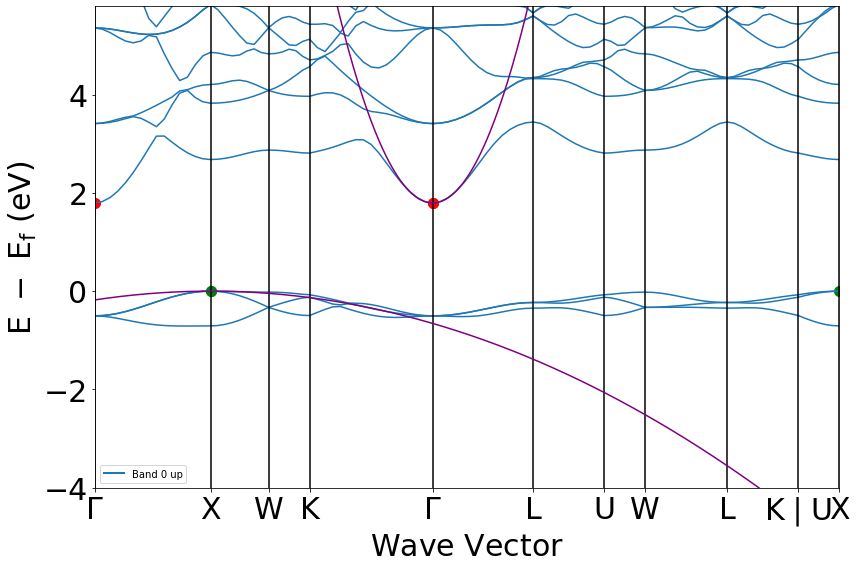

In [137]:
hbar = 6.62607015e-34/(2*np.pi)
eV = 1.602176634e-19
A = 1e-10

d = data.get('distances')

interpdom = np.linspace(d[0][0], d[9][-1], 500)

# Interpolation et calcul de la masse effective pour la bande de valence
xVal = [2*absc[1]-d[1][3], absc[1], d[1][3]]
yVal = [energies[1][11][3], energies[1][11][0], energies[1][11][3]]

interpVal = np.polyfit(xVal, yVal, 2) # Permet d'afficher la parabole interpolée

alphaVal = (energies[1][11][3])*eV*A**2/((d[1][3]-absc[1])**2) # Attention aux unités !!!!!!
massVal = (hbar**2) * 0.5 * (1/alphaVal)
print("Masse effective au sommet de la bande de valence :", massVal, "kg.\n")

# Interpolation et calcul de la masse effective pour la bande de conduction
xCond = [2*absc[4]-d[4][3], absc[4], d[4][3]]
yCond = [energies[4][12][3], energies[4][12][0], energies[4][12][3]]

interpCond = np.polyfit(xCond, yCond, 2) # Permet d'afficher la parabole interpolée

alphaCond = (energies[4][12][3]-energies[4][12][0])*eV*A**2/((d[4][3]-absc[4])**2) # Attention aux unités !!!!!!
massCond = (hbar**2) * 0.5 * (1/alphaCond)
print("Masse effective au minimum de la bande de conduction :", massCond, "kg.\n")


plotter.get_plot(vbm_cbm_marker=True)
plt.plot(interpdom, np.polyval(interpVal, interpdom), 'purple')
plt.plot(interpdom, np.polyval(interpCond, interpdom), 'purple')